# 1.6. Практика

## Импорт библиотек

In [72]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [73]:
df = pd.read_csv('DataEngineer.csv')

df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1


In [74]:
# Missing data

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

Пропущенных данных нет.

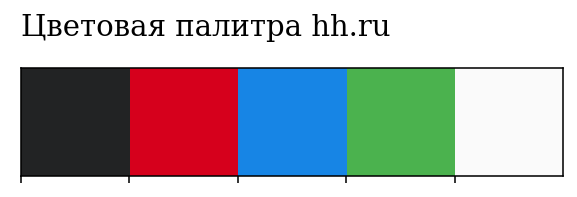

In [75]:
# Palette
palette = ['#222324', '#D6001C', '#1785E5', '#4BB24E', '#FAFAFA']
sns.palplot(palette)

plt.title("Цветовая палитра hh.ru", loc='left',
          fontfamily='serif', fontsize=15, y=1.2)
plt.show()


## 1. Построить график компаний с самым большим кол-вом вакансий

In [76]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split("\n")[0])
df['count'] = 1
data = df.groupby('Company Name')['count'].sum().sort_values(ascending=False)[:10]
data

Company Name
Amazon                        28
Lockheed Martin               18
Apple                         18
IntraEdge                     16
Humana                        16
Diverse Lynx                  15
Bell Helicopter               15
Management Decisions, Inc.    14
Google                        14
MUFG                          13
Name: count, dtype: int64

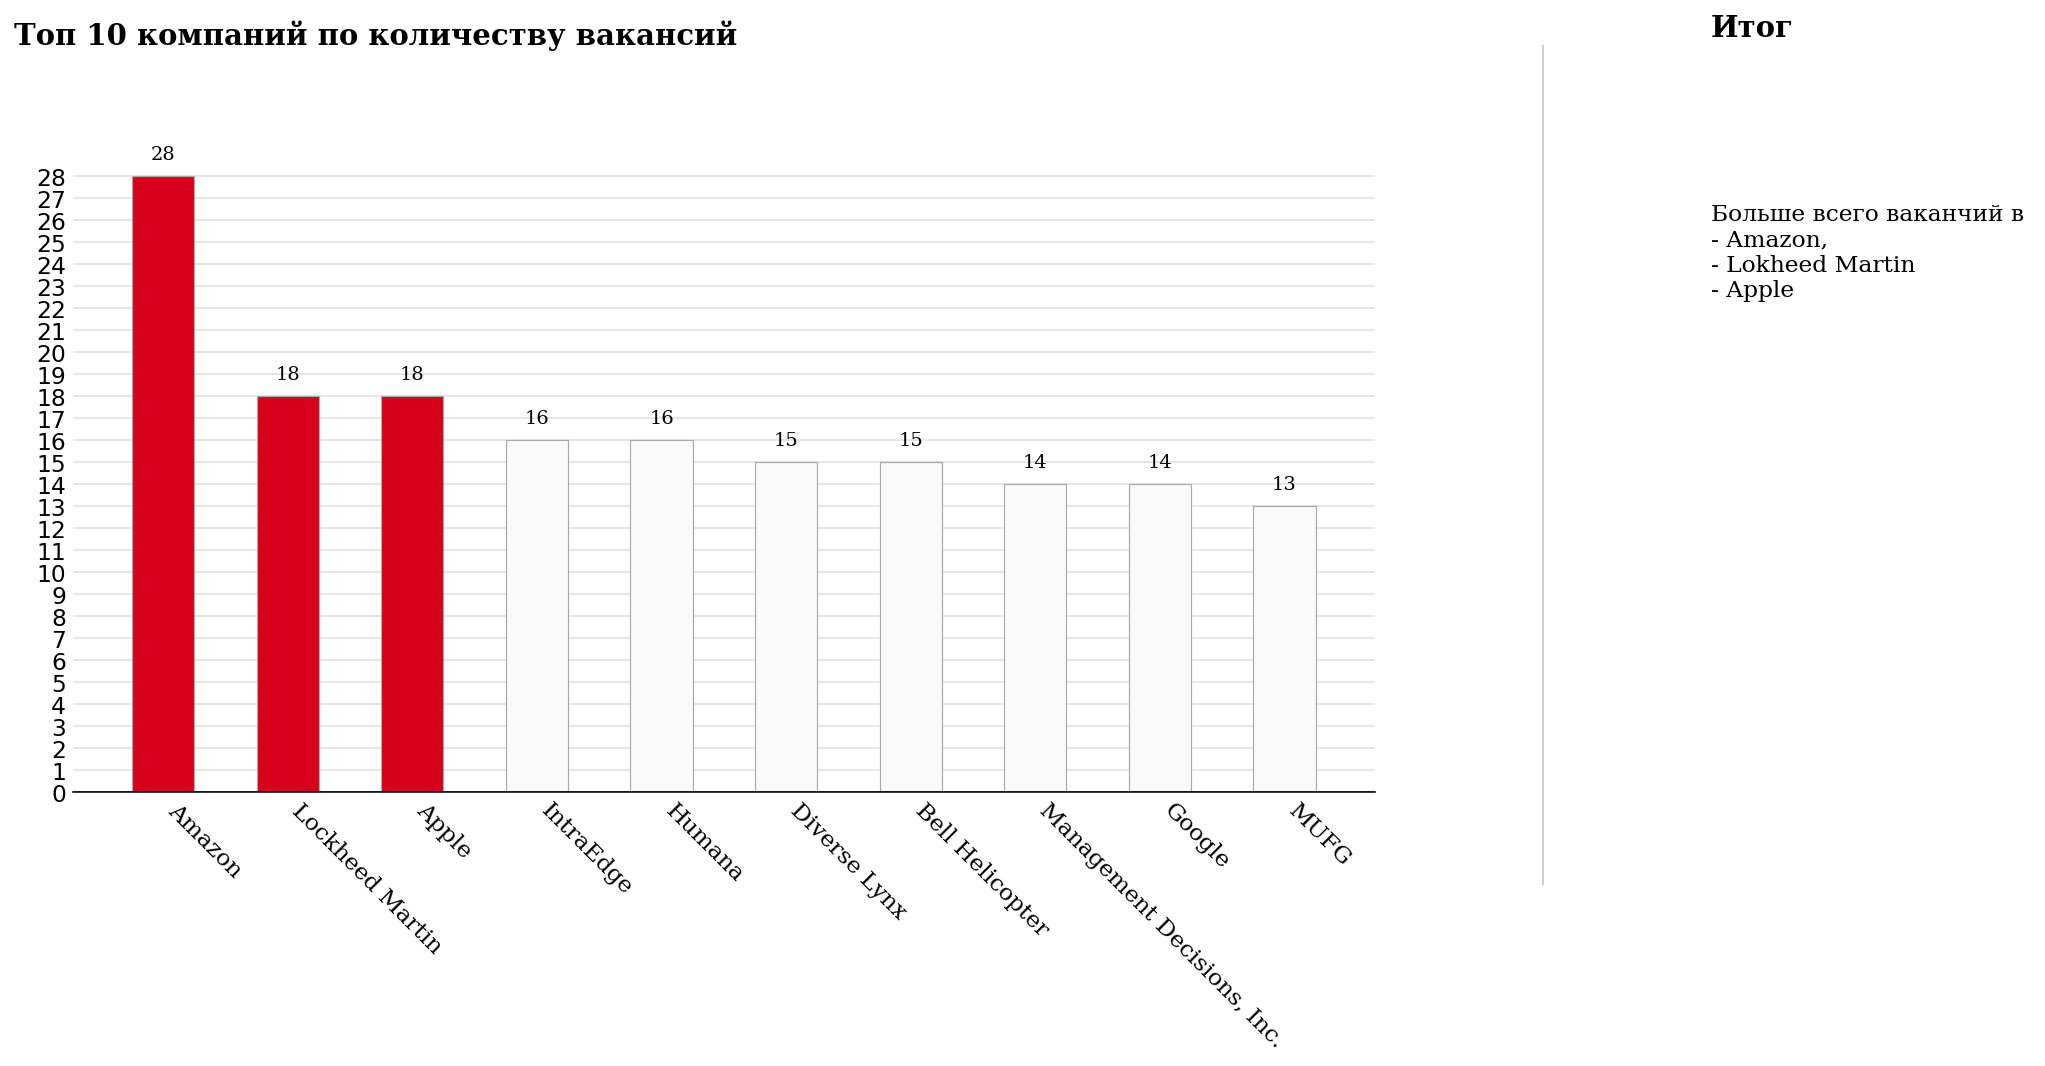

In [77]:
# Plot

color_map = [palette[4] for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  palette[1] # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 1), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', )



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=-45, ha='left')

# Title and sub-title

fig.text(0.09, 1, 'Топ 10 компаний по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Больше всего ваканчий в 
- Amazon, 
- Lokheed Martin
- Apple
''', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 29, 1) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## 2. Построить график самых популярный названий в вакансиях

In [78]:

data = df.groupby('Job Title')['count'].sum().sort_values(ascending=False)[:10]
data

Job Title
Data Engineer                469
Senior Data Engineer         103
Software Engineer             93
Big Data Engineer             73
Sr. Data Engineer             35
Machine Learning Engineer     17
Data Engineer II              16
Data Warehouse Engineer       14
Systems Engineer              13
Data Platform Engineer        13
Name: count, dtype: int64

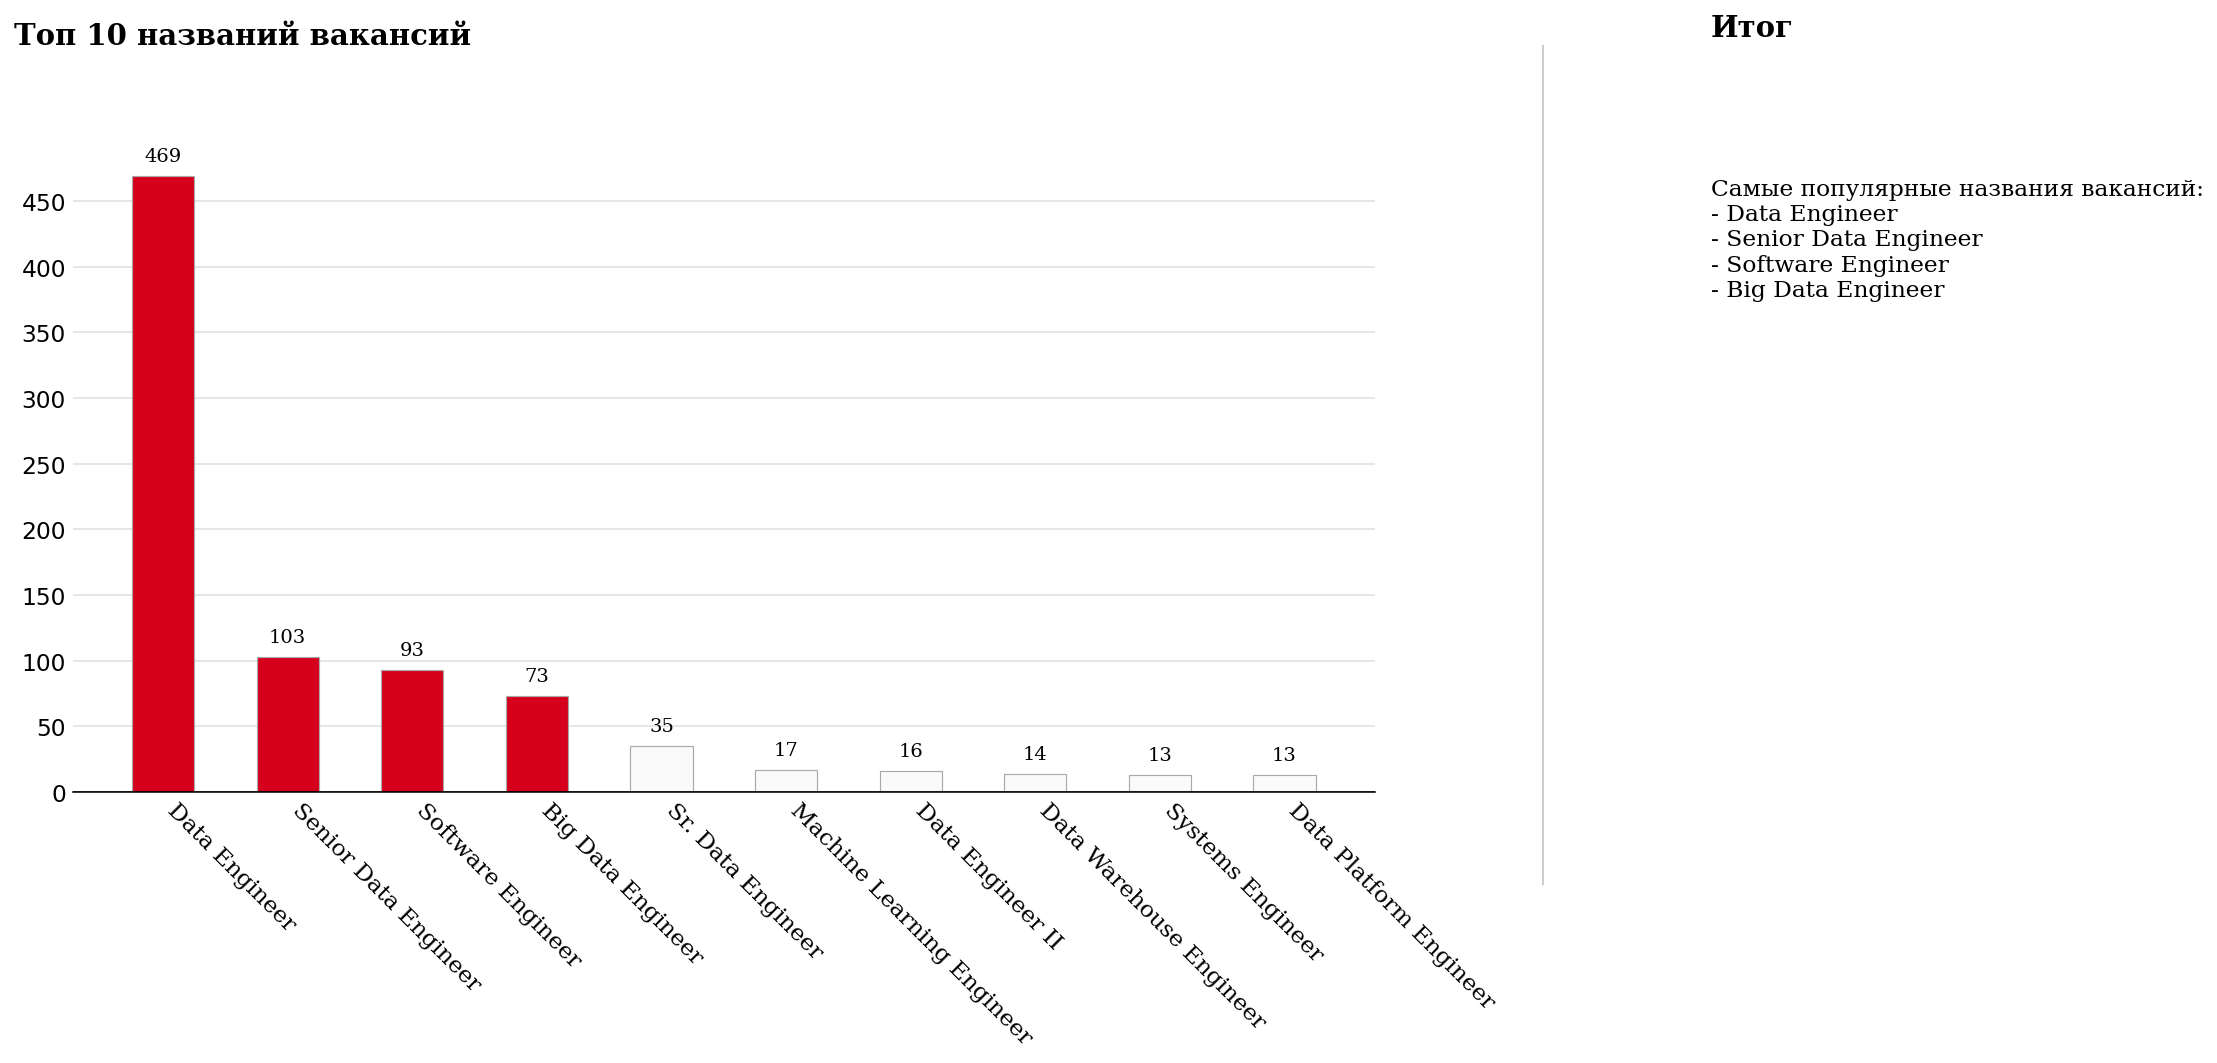

In [79]:
# Plot

color_map = [palette[4] for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] =  palette[1] # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 15),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', )



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=-45, ha='left')

# Title and sub-title

fig.text(0.09, 1, 'Топ 10 названий вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Самые популярные названия вакансий:
- Data Engineer  
- Senior Data Engineer
- Software Engineer
- Big Data Engineer 
''', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 500, 50) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## 3. Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

In [80]:
df['Location'] = df['Location'].apply(lambda x: x.split(",")[0])
df['count'] = 1
data = df.groupby('Location')['count'].sum().sort_values(ascending=False)[:10]
data

Location
Austin          199
Houston         199
San Diego       195
Chicago         192
San Antonio     190
New York        187
Philadelphia    135
Jacksonville    122
Phoenix         117
Los Angeles     106
Name: count, dtype: int64

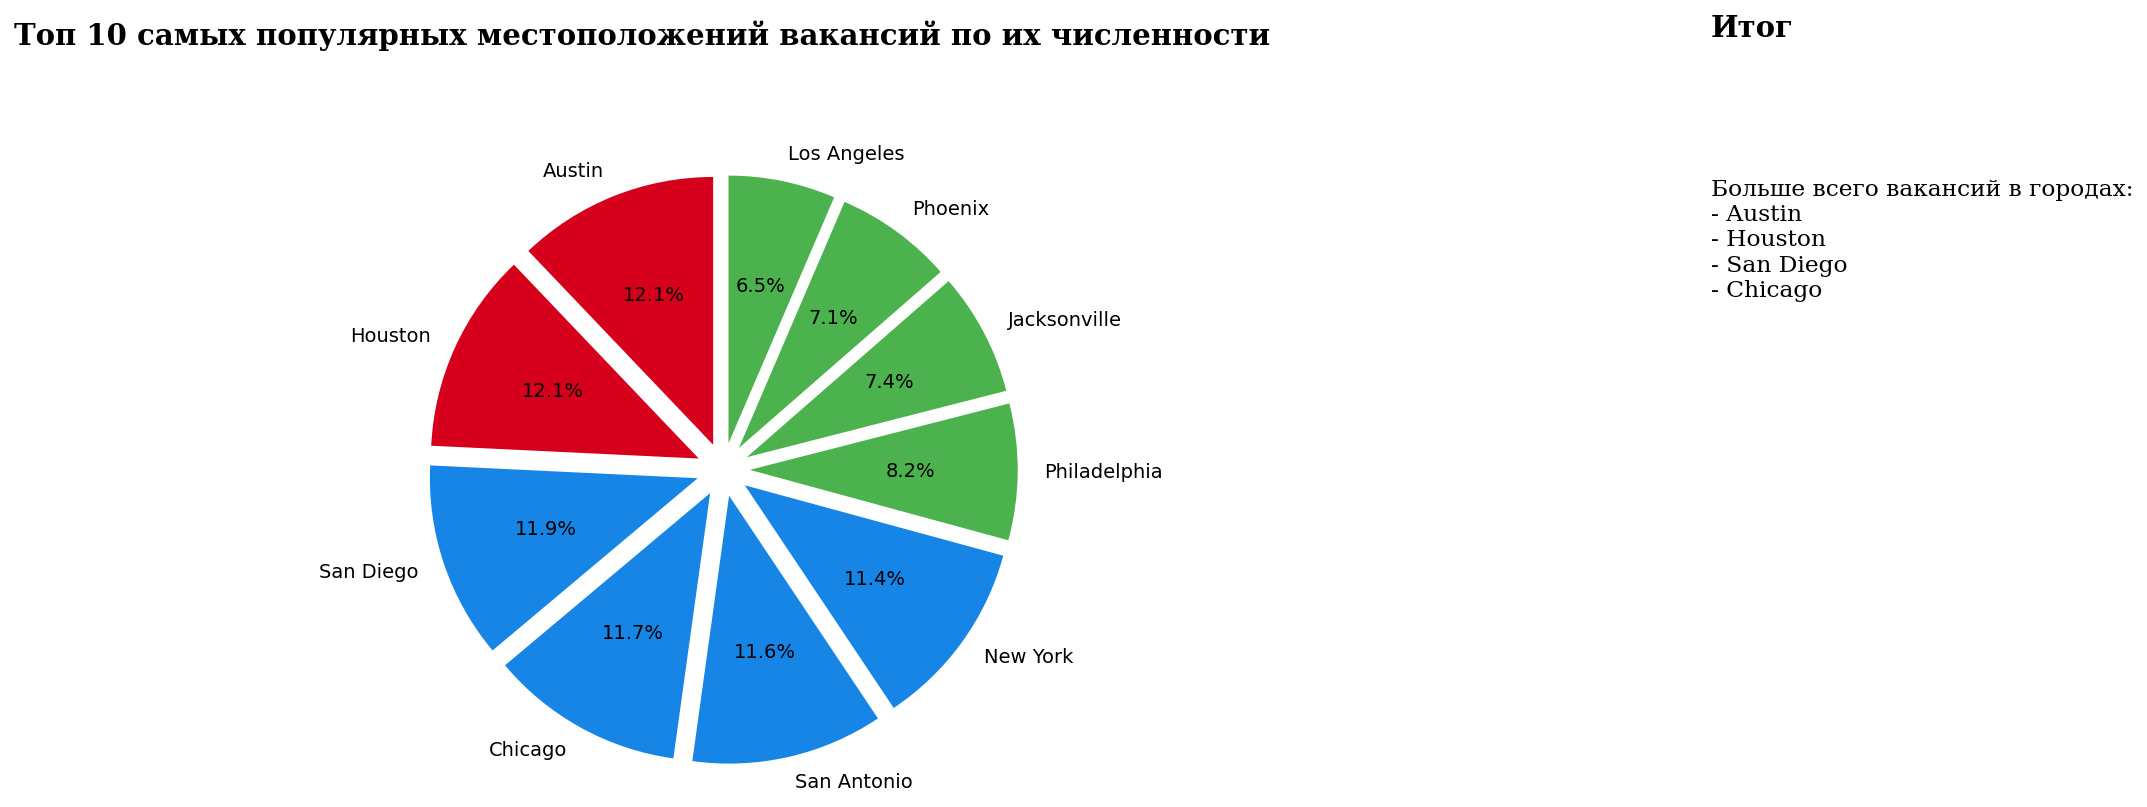

In [109]:
# Plot

color_map = [palette[3] for _ in range(10)]
color_map[0] = color_map[1] = palette[1] 
color_map[2] =color_map[3] = color_map[4] = color_map[5] =  palette[2] 

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.pie(data.values, labels=data.index, autopct='%1.1f%%',
        startangle=90, colors=color_map, explode=[0.1 for _ in range(10)])
ax.axis('equal')

fig.text(0.09, 1, 'Топ 10 самых популярных местоположений вакансий по их численности', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Больше всего вакансий в городах:
- Austin            
- Houston         
- San Diego  
- Chicago          
''', fontsize=12, fontweight='light', fontfamily='serif')

plt.show()

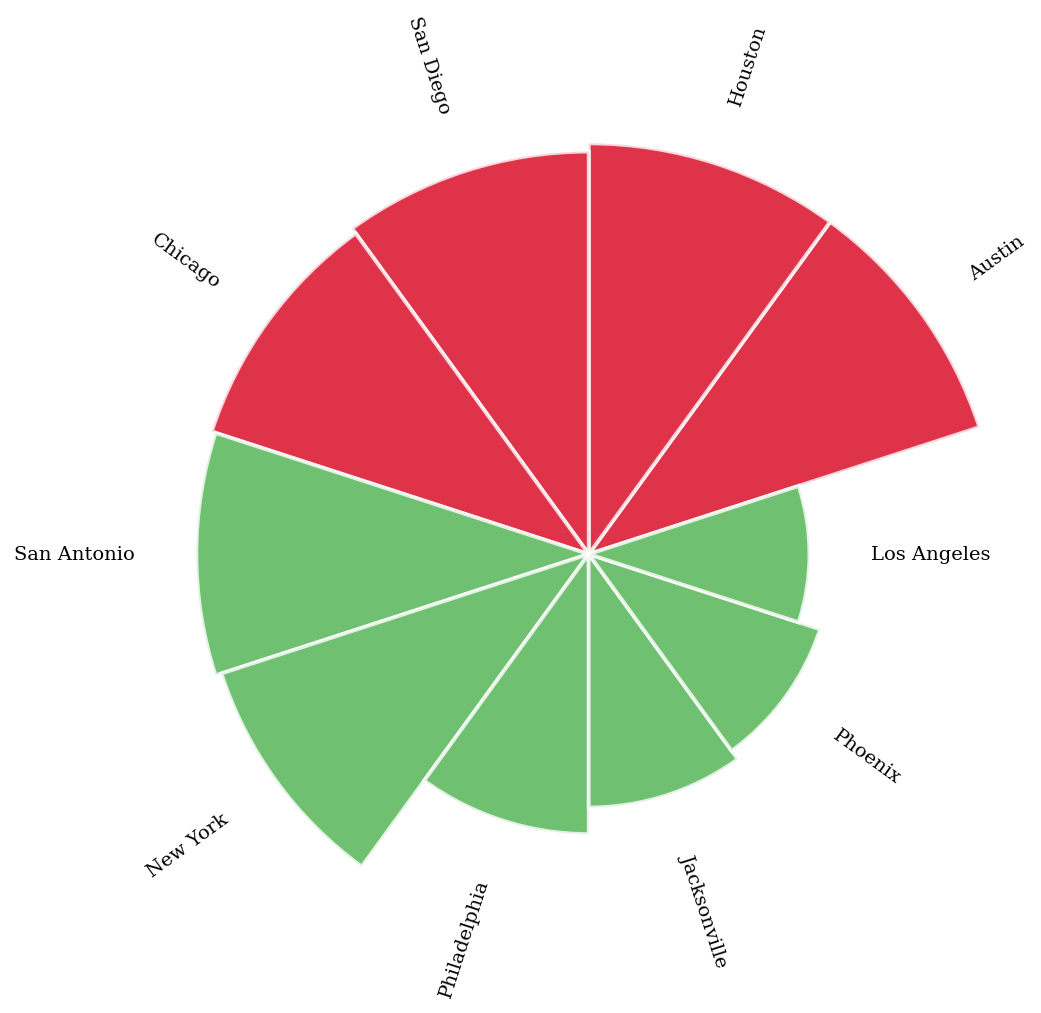

In [85]:

color_map = [palette[3] for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] =  palette[1] # color highlight

# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = data.max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * data + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(data.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(data.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, data.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

## 4. Построить график популярности по колонке Type of ownership, относительно численности вакансий

In [128]:
df['Type of ownership'] = df['Type of ownership'].apply(
    lambda x: "Unknown" if x == "-1" else x)
data = pd.DataFrame()
data["count"] = df.groupby('Type of ownership')[
    'count'].sum().sort_values(ascending=False)
data["color"] = data.apply(lambda x: palette[0] if x.name == "Unknown" else palette[1]
                           if x["count"] > 100 else palette[2] if x["count"] > 10 else palette[3], axis=1)
data

,count,color
Type of ownership,,
Company - Private,1392,#D6001C
Company - Public,754,#D6001C
Unknown,149,#222324
Subsidiary or Business Segment,126,#D6001C
Nonprofit Organization,48,#1785E5
Government,21,#1785E5
College / University,13,#1785E5
Contract,10,#4BB24E
Private Practice / Firm,6,#4BB24E


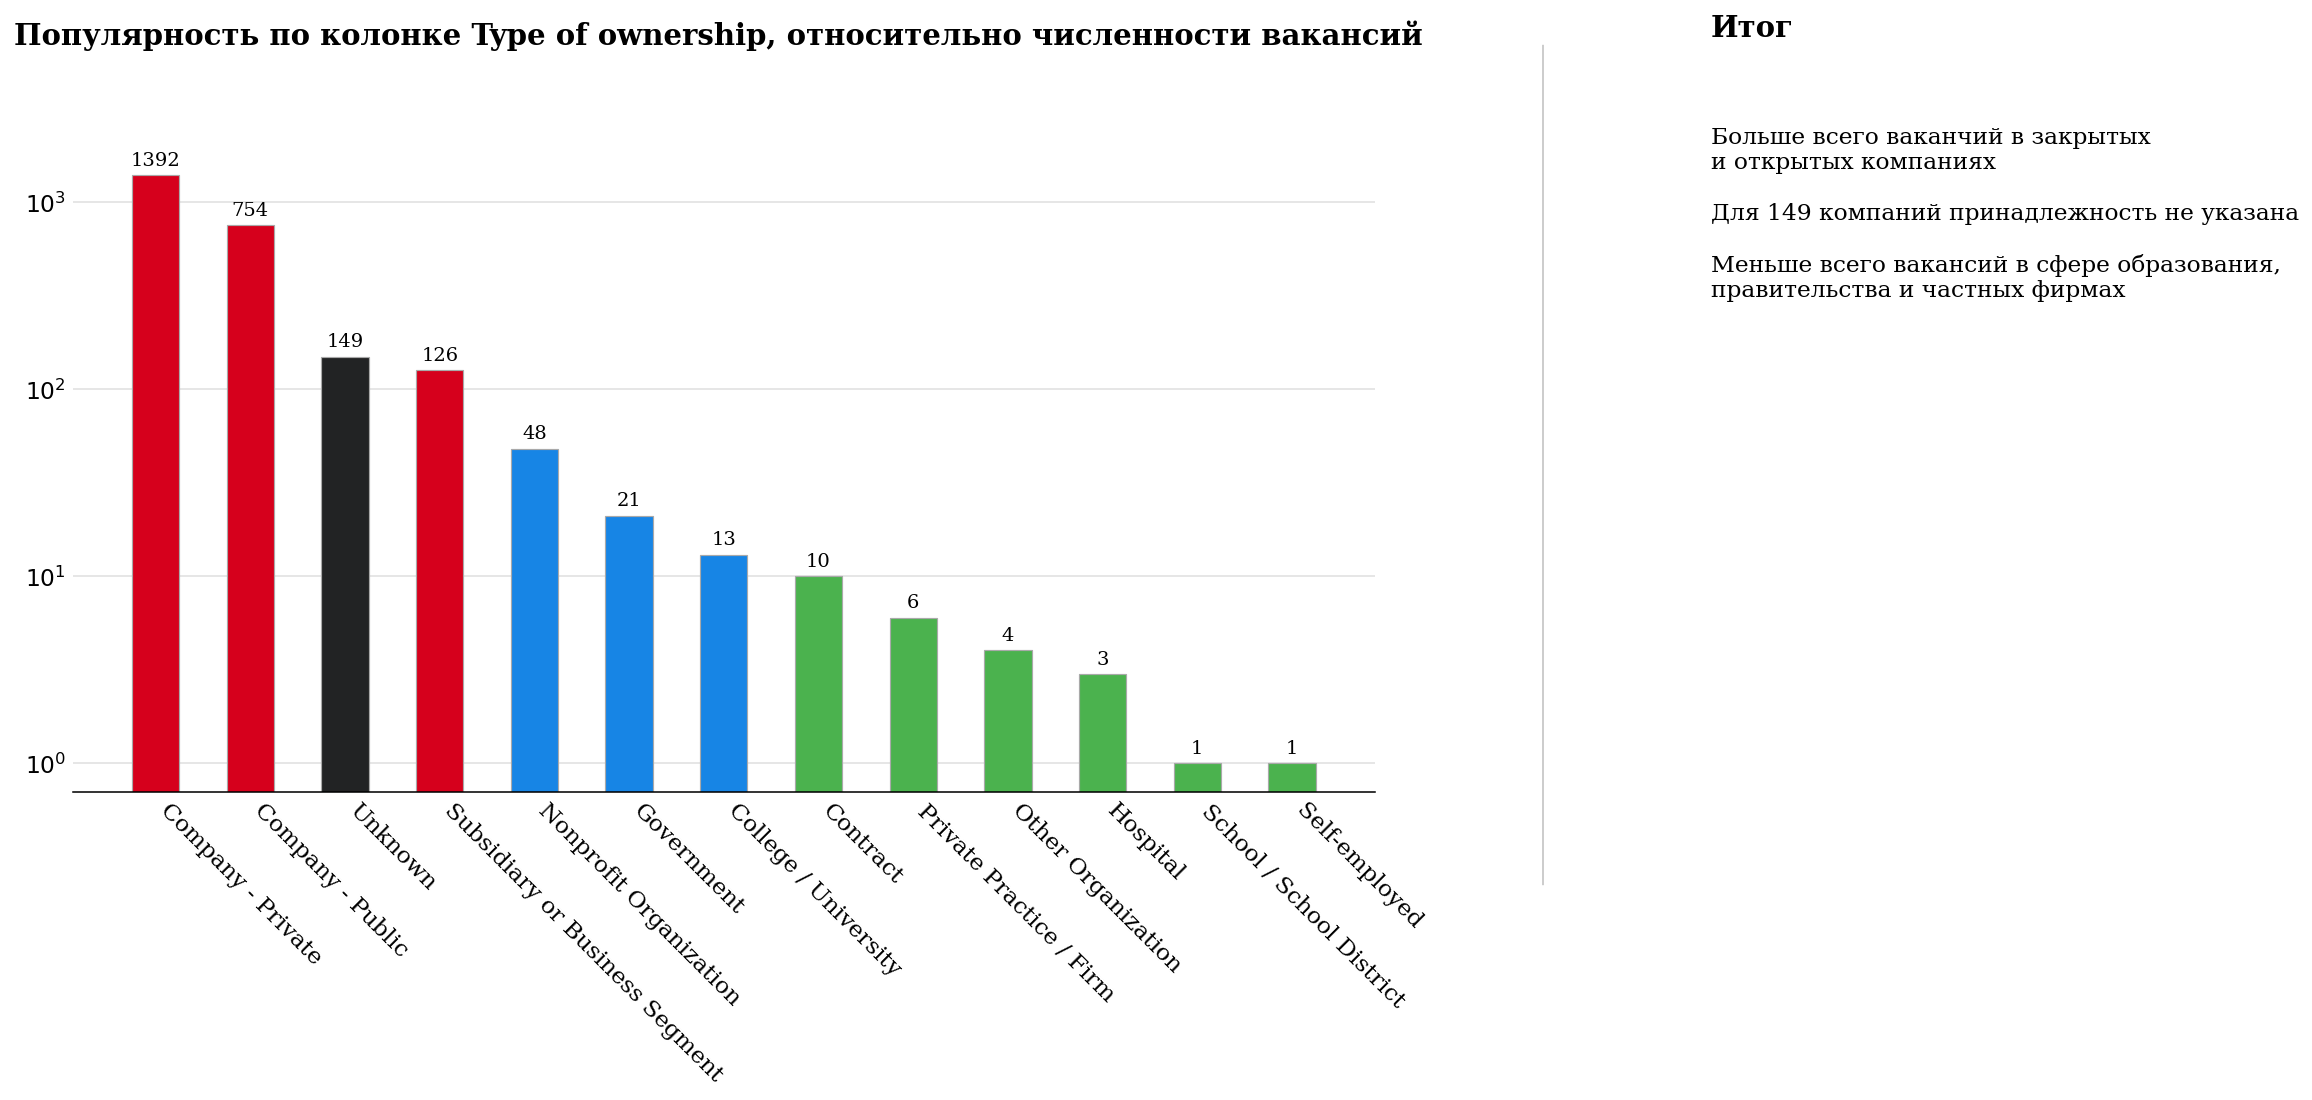

In [152]:
# Plot
import math


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data["count"], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=data["color"].to_list())

#annotations
for i in data.index:
    ann = data["count"][i]
    ax.annotate(f"{ann}", 
                   xy=(i, data["count"][i]*1.2),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', )



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=-45, ha='left')

# Title and sub-title

fig.text(0.09, 1, 'Популярность по колонке Type of ownership, относительно численности вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Больше всего ваканчий в закрытых 
и открытых компаниях

Для 149 компаний принадлежность не указана

Меньше всего вакансий в сфере образования, 
правительства и частных фирмах
''', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1400, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
ax.set_yscale(value='log')
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## 5. Построить график популярности по секторам работы

In [154]:
df['Sector'] = df['Sector'].apply(
    lambda x: "Unknown" if x == "-1" else x)
data = pd.DataFrame()
data["count"] = df.groupby('Sector')[
    'count'].sum().sort_values(ascending=False)
data["color"] = data.apply(lambda x: palette[0] if x.name == "Unknown" else palette[1]
                           if x["count"] > 100 else palette[2] if x["count"] > 10 else palette[3], axis=1)
data

,count,color
Sector,,
Information Technology,890,#D6001C
Business Services,416,#D6001C
Unknown,375,#222324
Finance,177,#D6001C
Aerospace & Defense,94,#1785E5
Manufacturing,93,#1785E5
Insurance,82,#1785E5
Media,52,#1785E5
Health Care,51,#1785E5


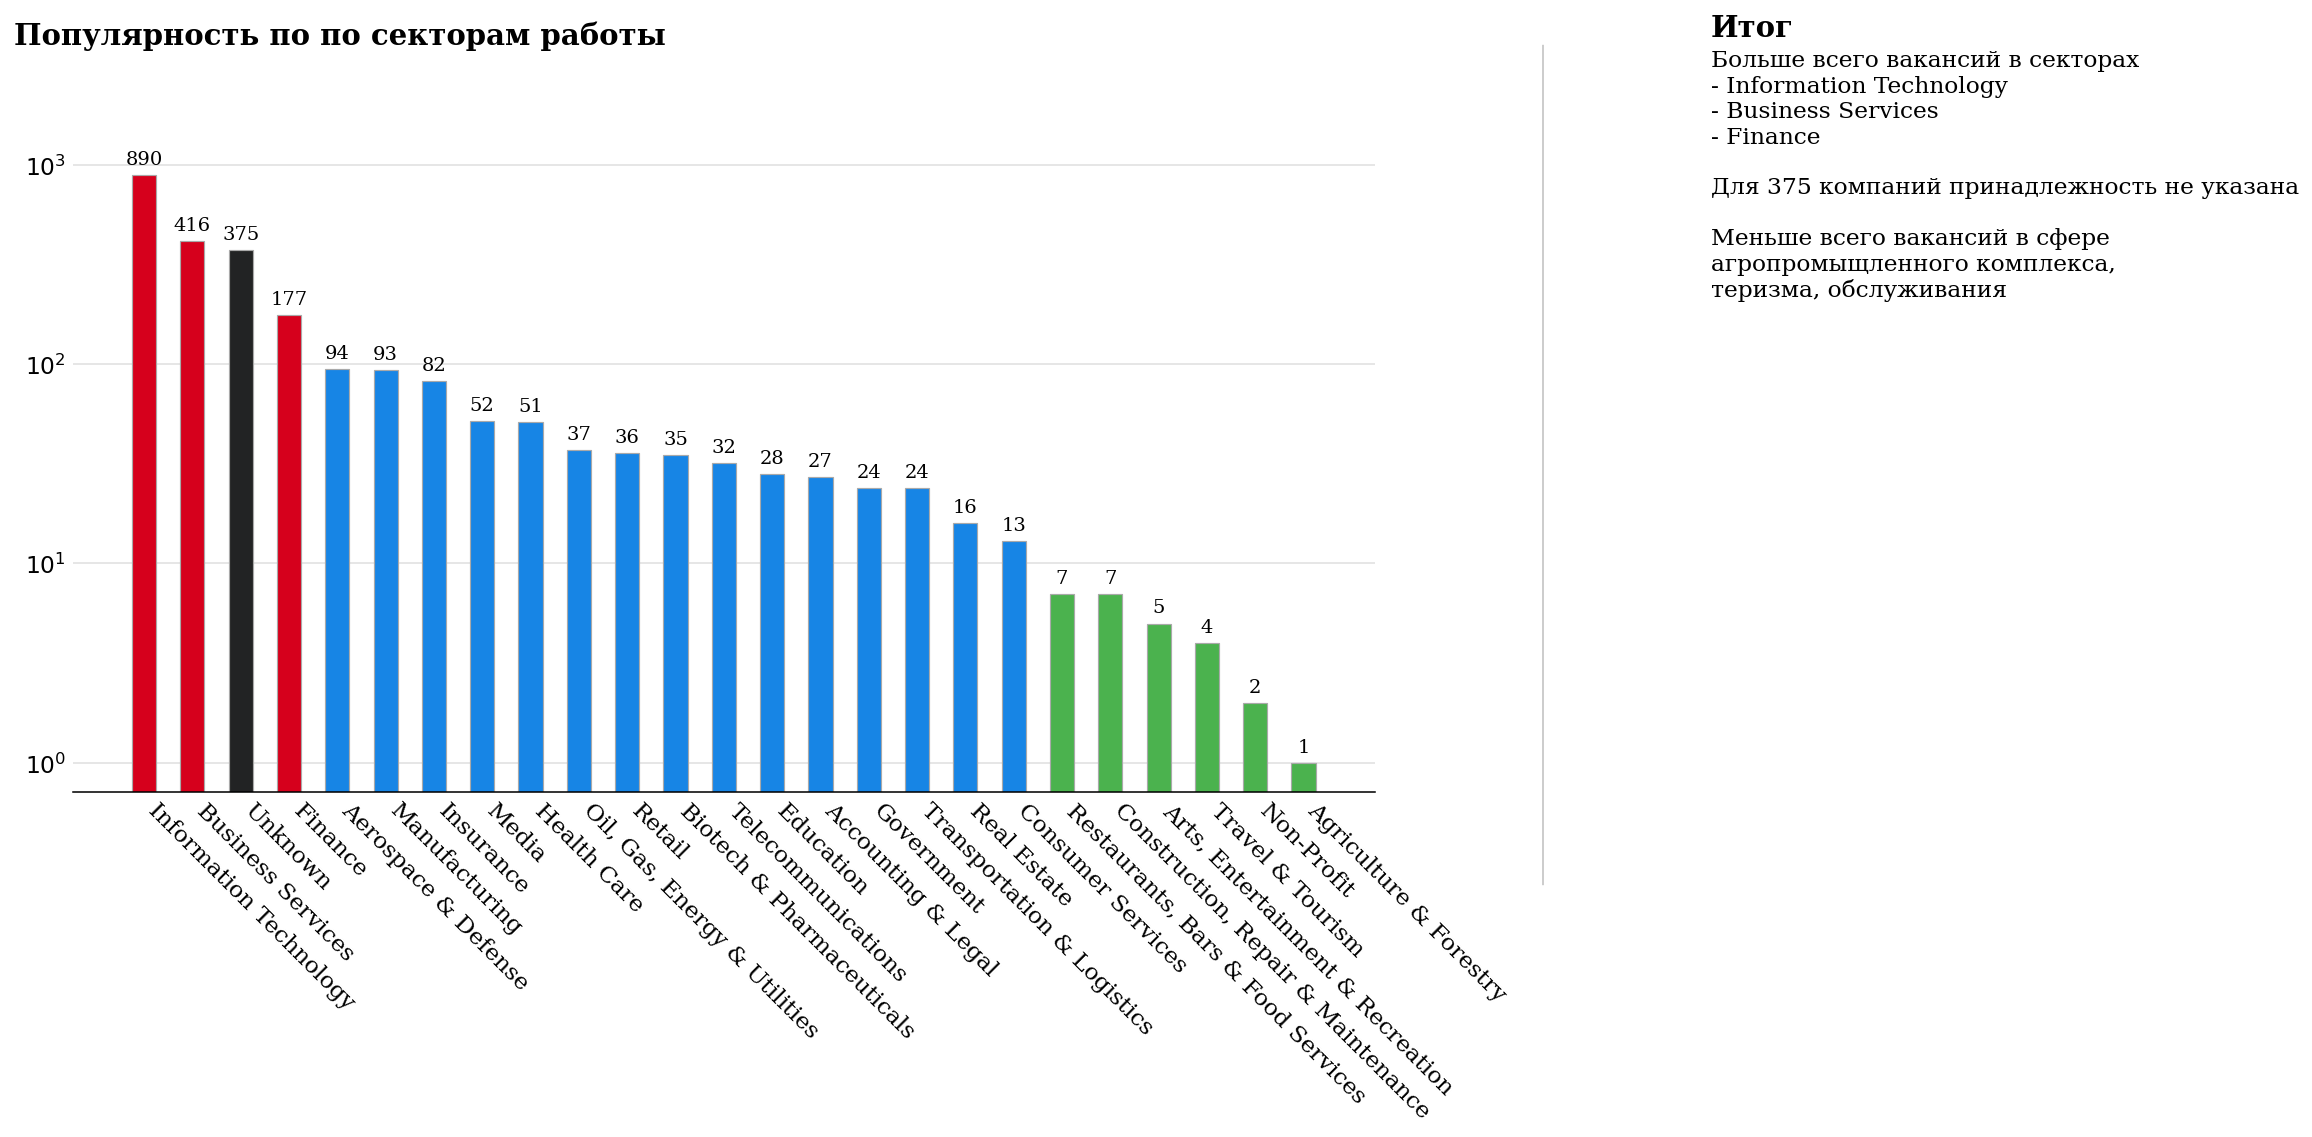

In [156]:
# Plot
import math


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data["count"], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=data["color"].to_list())

#annotations
for i in data.index:
    ann = data["count"][i]
    ax.annotate(f"{ann}", 
                   xy=(i, data["count"][i]*1.2),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif', )



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=-45, ha='left')

# Title and sub-title

fig.text(0.09, 1, 'Популярность по по секторам работы', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Больше всего ваканcий в секторах
- Information Technology
- Business Services
- Finance

Для 375 компаний принадлежность не указана

Меньше всего вакансий в сфере 
агропромыщленного комплекса, 
теризма, обслуживания
''', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1400, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
ax.set_yscale(value='log')
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## 9. Построить по описанию вакансий облако тегов, исследовать самые популярные слова

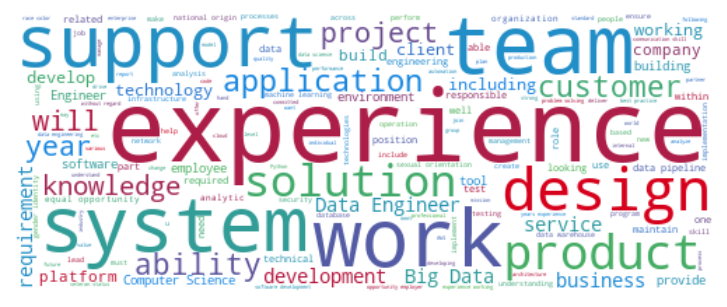

In [84]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", palette[1:4])

text = str(list(df['Job Description'])).replace(',', '').replace(
    '[', '').replace("'", '').replace(']', '').replace('.', '').replace('\n', '').replace('\\n', '')

wordcloud = WordCloud(background_color='white', width=500,
                      height=200, colormap=cmap, max_words=150).generate(text)

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
